In [51]:
import pandas as pd 

meets_stats = 'meets.csv'
powerlift_stats = 'openpowerlifting.csv'

df_meet_stats = pd.read_csv(meets_stats)
df_powerlift_stats = pd.read_csv(powerlift_stats)

In [52]:
df_meet_stats
# print("Meet Info:", df_meet_stats.info())

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic
2,2,365strong/1603,365Strong,2016-07-09,USA,NC,Charlotte,Charlotte Europa Games
3,3,365strong/1604,365Strong,2016-06-11,USA,SC,Rock Hill,Carolina Cup Push Pull Challenge
4,4,365strong/1605,365Strong,2016-04-10,USA,SC,Rock Hill,Eastern USA Challenge
...,...,...,...,...,...,...,...,...
8477,8477,xpc/2015-finals,XPC,2015-03-06,USA,OH,Columbus,2015 XPC
8478,8478,xpc/2016-bench-freak-show,XPC,2016-03-04,USA,OH,Columbus,2016 XPC Bench Freak Show
8479,8479,xpc/2016-elite-finals,XPC,2016-03-04,USA,OH,Columbus,2016 XPC Elite Finals
8480,8480,xpc/2016-pro-finals,XPC,2016-03-05,USA,OH,Columbus,2016 XPC PRO Finals


In [53]:
df_powerlift_stats
print("Dataframe Info:", df_powerlift_stats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          386414 non-null  int64  
 1   Name            386414 non-null  object 
 2   Sex             386414 non-null  object 
 3   Equipment       386414 non-null  object 
 4   Age             147147 non-null  float64
 5   Division        370571 non-null  object 
 6   BodyweightKg    384012 non-null  float64
 7   WeightClassKg   382602 non-null  object 
 8   Squat4Kg        1243 non-null    float64
 9   BestSquatKg     298071 non-null  float64
 10  Bench4Kg        1962 non-null    float64
 11  BestBenchKg     356364 non-null  float64
 12  Deadlift4Kg     2800 non-null    float64
 13  BestDeadliftKg  317847 non-null  float64
 14  TotalKg         363237 non-null  float64
 15  Place           385322 non-null  object 
 16  Wilks           362194 non-null  float64
dtypes: float64

In [55]:
missing_values = df_meet_stats.isnull().sum()
problem_columns = missing_values[missing_values > 0].sort_values(ascending=False)
print("Columns with Missing Values:", problem_columns)

Columns with Missing Values: MeetState    2986
MeetTown     1509
dtype: int64


In [56]:
missing_values = df_powerlift_stats.isnull().sum()
problem_columns = missing_values[missing_values > 0].sort_values(ascending=False)
print("Columns with Missing Values:", problem_columns)

Columns with Missing Values: Squat4Kg          385171
Bench4Kg          384452
Deadlift4Kg       383614
Age               239267
BestSquatKg        88343
BestDeadliftKg     68567
BestBenchKg        30050
Wilks              24220
TotalKg            23177
Division           15843
WeightClassKg       3812
BodyweightKg        2402
Place               1092
dtype: int64


In [58]:
print(f"Number of duplicate rows: {df_powerlift_stats.duplicated().sum()}")
print(f"Number of duplicate columns: {df_powerlift_stats.columns.duplicated().sum()}")
df_powerlift_stats.drop_duplicates(inplace=True)
df = df_powerlift_stats.loc[:, ~df_powerlift_stats.columns.duplicated()]
print("Duplicates dropped")

Number of duplicate rows: 545
Number of duplicate columns: 0
Duplicates dropped


In [59]:
df_powerlift_stats

,MeetID,Name,Sex,Equipment,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,Mst 45-49,59.60,60,47.63,20.41,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,Mst 40-44,58.51,60,142.88,95.25,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,Open Senior,58.51,60,142.88,95.25,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,Open Senior,58.51,60,NaN,95.25,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,Teen 18-19,63.68,67.5,NaN,31.75,90.72,122.47,1,130.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386409,8481,William Barabas,M,Multi-ply,Elite,113.58,125,NaN,NaN,347.50,347.50,2,202.60
386410,8481,Justin Zottl,M,Multi-ply,Elite,119.02,125,NaN,NaN,322.50,322.50,3,185.77
386411,8481,Jake Anderson,M,Multi-ply,Elite,120.29,125,NaN,NaN,367.50,367.50,1,211.17
386412,8481,Jeff Bumanglag,M,Multi-ply,Elite,126.73,140,NaN,NaN,320.00,320.00,3,181.85


In [60]:
missing_values = df_meet_stats.isnull().sum()
problem_columns = missing_values[missing_values > 0].sort_values(ascending=False)
print("Columns with Missing Values:", problem_columns)

Columns with Missing Values: MeetState    2986
MeetTown     1509
dtype: int64


In [61]:
print(f"Number of duplicate rows: {df_powerlift_stats.duplicated().sum()}")
print(f"Number of duplicate columns: {df_powerlift_stats.columns.duplicated().sum()}")


Number of duplicate rows: 0
Number of duplicate columns: 0


In [62]:
print(f"Number of duplicate rows: {df_meet_stats.duplicated().sum()}")
print(f"Number of duplicate columns: {df_meet_stats.columns.duplicated().sum()}")
# df_powerlift_stats.drop_duplicates(inplace=True)
# df = df_powerlift_stats.loc[:, ~df_powerlift_stats.columns.duplicated()]
# print("Duplicates dropped")

Number of duplicate rows: 0
Number of duplicate columns: 0


In [63]:
df_meet_stats.dropna(axis=0, inplace=True)

In [64]:
df_meet_stats

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic
2,2,365strong/1603,365Strong,2016-07-09,USA,NC,Charlotte,Charlotte Europa Games
3,3,365strong/1604,365Strong,2016-06-11,USA,SC,Rock Hill,Carolina Cup Push Pull Challenge
4,4,365strong/1605,365Strong,2016-04-10,USA,SC,Rock Hill,Eastern USA Challenge
...,...,...,...,...,...,...,...,...
8477,8477,xpc/2015-finals,XPC,2015-03-06,USA,OH,Columbus,2015 XPC
8478,8478,xpc/2016-bench-freak-show,XPC,2016-03-04,USA,OH,Columbus,2016 XPC Bench Freak Show
8479,8479,xpc/2016-elite-finals,XPC,2016-03-04,USA,OH,Columbus,2016 XPC Elite Finals
8480,8480,xpc/2016-pro-finals,XPC,2016-03-05,USA,OH,Columbus,2016 XPC PRO Finals


In [65]:
df_powerlift_stats.dropna(axis=0, inplace=True)
df_powerlift_stats

,MeetID,Name,Sex,Equipment,Division,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,Mst 45-49,59.60,60,47.63,20.41,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,Mst 40-44,58.51,60,142.88,95.25,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,Open Senior,58.51,60,142.88,95.25,163.29,401.42,1,456.38
5,0,Courtney Norris,F,Wraps,Open Senior,62.41,67.5,170.10,77.11,145.15,392.36,1,424.40
6,0,Maureen Clary,F,Raw,Mst 60-64,67.31,67.5,124.74,95.25,163.29,383.28,1,391.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386379,8481,Stephen Davis,M,Wraps,Elite,136.62,140,285.76,222.26,340.19,848.22,1,475.77
386380,8481,Terrance Gilbert,M,Wraps,Elite,136.62,140,322.05,183.70,310.71,816.47,2,457.96
386381,8481,Kevin McHugh,M,Wraps,Elite,179.80,140+,385.55,208.65,344.73,938.94,1,505.40
386382,8481,Patrick Vincent Maguire,M,Wraps,Elite,145.97,140+,362.87,242.67,288.03,893.58,2,496.32


In [70]:
import sqlite3

# Establish a connection to the SQLite database
conn = sqlite3.connect('powerlift.db')
cursor = conn.cursor()

cursor.execute('''DROP TABLE IF EXISTS openpowerlifting''')
cursor.execute('''DROP TABLE IF EXISTS meets''')

# Define table schemas and create tables
cursor.execute('''CREATE TABLE openpowerlifting (
                    MeetID INTEGER PRIMARY KEY,
                    Name TEXT,
                    Sex TEXT,
                    Equipment TEXT,
                    Age INTEGER,
                    Division TEXT,
                    BodyweightKg FLOAT,
                    WeightClassKg TEXT,
                    Squat4Kg FLOAT,
                    BestSquatKg FLOAT,
                    Bench4Kg FLOAT,
                    BestBenchKg FLOAT,
                    Deadlift4Kg FLOAT,
                    BestDeadliftKg FLOAT,
                    TotalKg FLOAT,  -- Corrected typo here
                    Place INTEGER,
                    Wilks FLOAT
                )''')

cursor.execute('''CREATE TABLE meets (
                    MeetID INTEGER PRIMARY KEY,
                    MeetPath TEXT,
                    Federation TEXT,
                    Date DATE,
                    MeetCountry TEXT,
                    MeetState TEXT,
                    MeetTown TEXT,
                    MeetName TEXT
                )''')

# Assuming df_powerlift_stats and df_meet_stats are lists of tuples containing data to insert
cursor.executemany('INSERT INTO openpowerlifting VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)', df_powerlift_stats)
cursor.executemany('INSERT INTO meets VALUES (?, ?, ?, ?, ?, ?, ?, ?)', df_meet_stats)

conn.commit()
conn.close()


ProgrammingError: Incorrect number of bindings supplied. The current statement uses 17, and there are 1 supplied.

In [71]:


median_bodyweight = df_powerlift_stats['BodyweightKg'].median()

min_bodyweight = df_powerlift_stats['BodyweightKg'].min()
max_bodyweight = df_powerlift_stats['BodyweightKg'].max()
range_bodyweight = max_bodyweight - min_bodyweight

quartiles_bodyweight = df_powerlift_stats['BodyweightKg'].quantile([0.25, 0.5, 0.75])

variance_bodyweight = df_powerlift_stats['BodyweightKg'].var()

print("Additional Descriptive Statistics for BodyweightKg:")
print("Median:", median_bodyweight)
print("Range:", range_bodyweight)
print("1st Quartile (25th percentile):", quartiles_bodyweight[0.25])
print("2nd Quartile (50th percentile, Median):", quartiles_bodyweight[0.5])
print("3rd Quartile (75th percentile):", quartiles_bodyweight[0.75])
print("Variance:", variance_bodyweight)


Additional Descriptive Statistics for BodyweightKg:
Median: 82.2
Range: 209.1
1st Quartile (25th percentile): 68.7
2nd Quartile (50th percentile, Median): 82.2
3rd Quartile (75th percentile): 99.2
Variance: 508.4425931679586


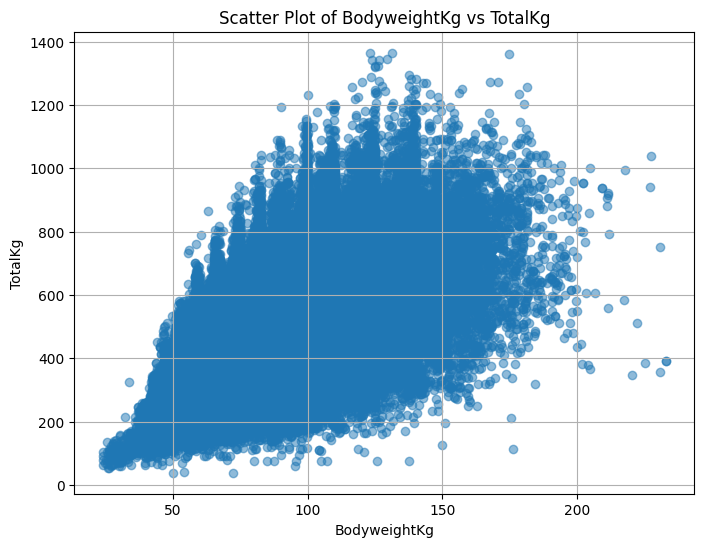

Correlation Coefficient between BodyweightKg and TotalKg: 0.6520994579907647


In [72]:

import matplotlib.pyplot as plt

correlation_coefficient = df_powerlift_stats['BodyweightKg'].corr(df_powerlift_stats['TotalKg'])

plt.figure(figsize=(8, 6))
plt.scatter(df_powerlift_stats['BodyweightKg'], df_powerlift_stats['TotalKg'], alpha=0.5)
plt.title('Scatter Plot of BodyweightKg vs TotalKg')
plt.xlabel('BodyweightKg')
plt.ylabel('TotalKg')
plt.grid(True)
plt.show()

print("Correlation Coefficient between BodyweightKg and TotalKg:", correlation_coefficient)


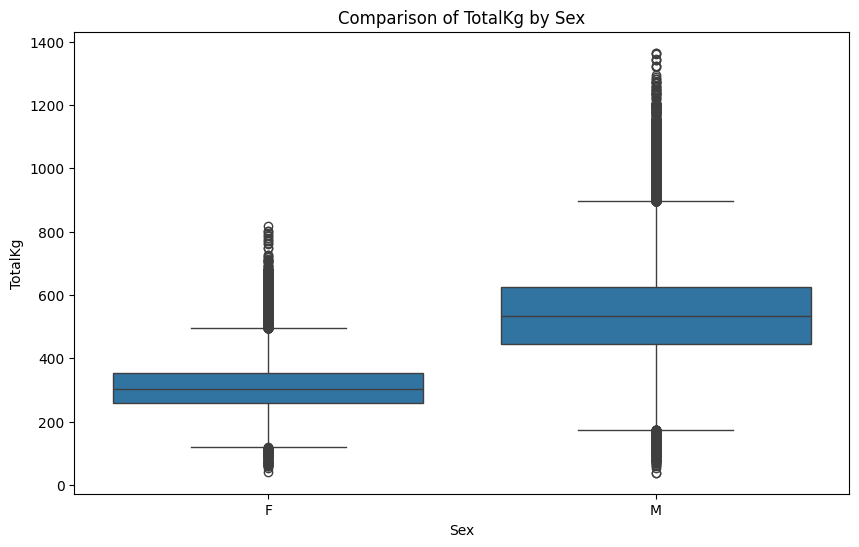

Descriptive Statistics for TotalKg by Sex:
        count        mean         std   min     25%     50%    75%      max
Sex                                                                        
F     64765.0  311.103125   77.496088  40.8  260.00  302.50  353.8   816.47
M    204916.0  538.949734  142.085062  38.6  444.52  532.97  625.0  1365.31


In [73]:

import seaborn as sns

grouped_stats = df_powerlift_stats.groupby('Sex')['TotalKg'].describe()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='TotalKg', data=df_powerlift_stats)
plt.title('Comparison of TotalKg by Sex')
plt.xlabel('Sex')
plt.ylabel('TotalKg')
plt.show()

print("Descriptive Statistics for TotalKg by Sex:")
print(grouped_stats)
